In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('master_data.csv')
print(data.shape)

(1240, 64)


In [3]:
data.head()

,Unnamed: 0,UNITID,INSTNM_x,Percent of students over 23 at entry,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BORN_US,MEDIAN_HH_INC,...,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54
0,0,100654,Alabama A & M University,0.08,46.840000,47.980000,1.48,3.79,94.739998,49720.22,...,0.0516,0.0399,0.0,0.0,0.0,0.0,0.0258,0.0000,0.1479,0.0000
1,1,100663,University of Alabama at Birmingham,0.26,69.019997,27.760000,1.10,2.03,96.500000,55735.22,...,0.0238,0.0408,0.0,0.0,0.0,0.0,0.0376,0.2231,0.1837,0.0188
2,3,100706,University of Alabama in Huntsville,0.29,76.379997,18.980000,1.42,2.55,95.269997,58688.62,...,0.0000,0.0189,0.0,0.0,0.0,0.0,0.0288,0.1892,0.2072,0.0117
3,4,100724,Alabama State University,0.11,42.689999,52.320000,1.41,4.09,94.529999,46065.20,...,0.0548,0.0151,0.0,0.0,0.0,0.0,0.0473,0.0926,0.0983,0.0113
4,5,100751,The University of Alabama,0.10,75.349998,21.059999,1.20,2.41,96.080002,57928.41,...,0.0102,0.0364,0.0,0.0,0.0,0.0,0.0295,0.1065,0.2886,0.0155


In [4]:
subset_df = data[['PCT_BLACK','Mean earnings of students working and not enrolled 10 years after entry']].copy()
subset_df.head()

,PCT_BLACK,Mean earnings of students working and not enrolled 10 years after entry
0,47.980000,34300
1,27.760000,46400
2,18.980000,50500
3,52.320000,29500
4,21.059999,49900


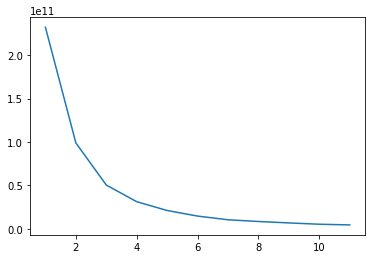

In [5]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(subset_df)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [6]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(subset_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(subset_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[  1.04746791e+01   4.69804813e+04]
 [  9.21128712e+00   6.65742574e+04]
 [  9.66499996e+00   1.15885714e+05]
 [  9.56504238e+00   5.49097458e+04]
 [  2.20079577e+01   3.28788732e+04]
 [  8.28850002e+00   8.63400000e+04]
 [  1.21963363e+01   4.02204204e+04]]


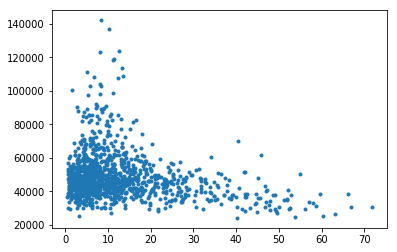

In [7]:
y=subset_df.iloc[:, 1].values
X=subset_df.iloc[:, 0].values
plt.scatter(X, y, marker='.')
plt.show()

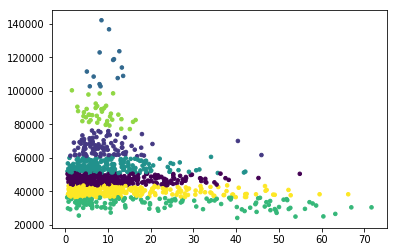

In [8]:
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [9]:
# Repeat the process w/ minmax scaling applied to the dataframe

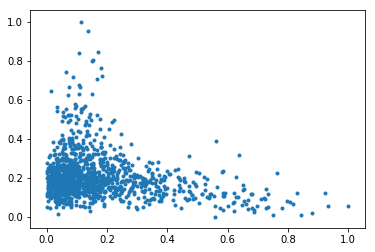

In [10]:
X = subset_df[['PCT_BLACK']]
y = subset_df[['Mean earnings of students working and not enrolled 10 years after entry']]
X_minmax = MinMaxScaler().fit(X)
y_minmax = MinMaxScaler().fit(y)
X_transformed = X_minmax.transform(X)
y_tranformed = y_minmax.transform(y)
plt.scatter(X_transformed, y_tranformed, marker='.')
plt.show()

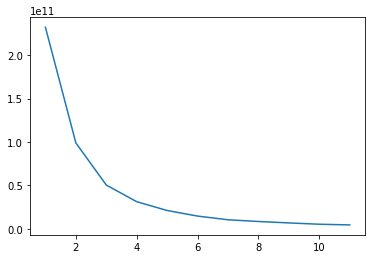

In [11]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(subset_df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['PCT', 'Earning'])

minmax_sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(minmax_scaled_df)
    minmax_sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(minmax_scaled_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(minmax_scaled_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.12456375  0.34660215]
 [ 0.39132635  0.15816708]
 [ 0.67433581  0.09440635]
 [ 0.06559666  0.129201  ]
 [ 0.11072472  0.60261238]
 [ 0.2043433   0.17695882]
 [ 0.06460165  0.22699353]]


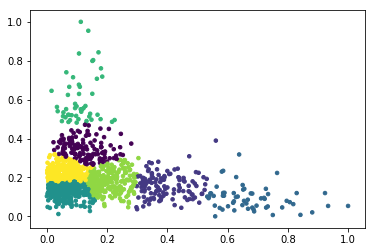

In [13]:
y=minmax_scaled_df.iloc[:, 1].values
X=minmax_scaled_df.iloc[:, 0].values
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [14]:
# Repeat the process w/ robust scaling

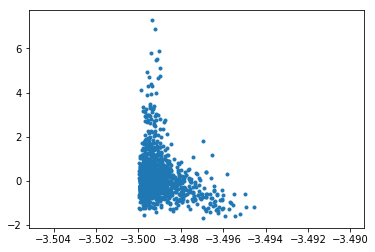

In [15]:
X = subset_df[['PCT_BLACK']]
y = subset_df[['Mean earnings of students working and not enrolled 10 years after entry']]
scaler = preprocessing.RobustScaler()
X_robust = scaler.fit(X)
y_robust = scaler.fit(y)
X_transformed = X_robust.transform(X)
y_tranformed = y_robust.transform(y)
plt.scatter(X_transformed, y_tranformed, marker='.')
plt.show()

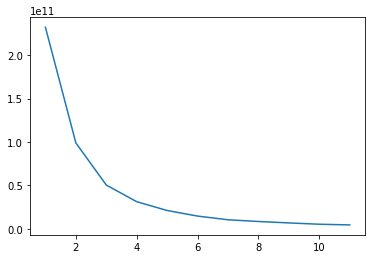

In [16]:
robust_scaled_df = scaler.fit_transform(subset_df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['PCT', 'Earning'])

minmax_sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(robust_scaled_df)
    minmax_sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(robust_scaled_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(robust_scaled_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.26098546 -0.51949103]
 [ 2.04227409 -0.25751156]
 [ 4.03648843 -0.82344633]
 [ 0.05662975  3.69266191]
 [-0.26294972  0.32771033]
 [ 0.13283892  1.35700758]
 [ 0.71949163 -0.11135371]]


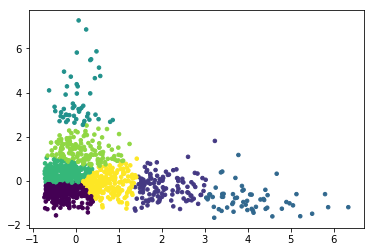

In [18]:
y=robust_scaled_df.iloc[:, 1].values
X=robust_scaled_df.iloc[:, 0].values
plt.scatter(X, y, marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
# Old code; ignore

In [ ]:
from sklearn import preprocessing
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(subset_df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['PCT', 'Earning'])

fig, ax2 = plt.subplots(ncols=1, figsize=(9, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(x['x1'], ax=ax1)
# sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['PCT'], ax=ax2)
sns.kdeplot(robust_scaled_df['Earning'], ax=ax2)
# ax3.set_title('After Min-Max Scaling')
# sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
# sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

In [ ]:
plt.scatter(robust_scaled_df['PCT'], robust_scaled_df['Earning'], marker='.')
plt.show()

In [ ]:
print(len(X['PCT_BLACK']))

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(subset_df)
# Getting the cluster labels
predicted_clusters = kmeans.predict(robust_scaled_df)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
plt.scatter(robust_scaled_df['PCT'], robust_scaled_df['Earning'], marker='.', c=predicted_clusters, s=50, cmap='viridis')
plt.show()